In [23]:
# Import Necessary Packages 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Meat Consumption Statistics

This EDA will study general trends in meat production metrics, with a specific focus on analyzing the different patterns displayed between red meat and poultry, especially given the former's studied associations with negative health and environmental outcomes

## Step 1 - Data Processing

In [61]:
meat_prod_raw = pd.read_csv("../Datathon_Data/Meat_Stats_Meat_Production.csv")
meat_storage_raw = pd.read_csv("../Datathon_Data/Meat_Stats_Cold_Storage.csv")
meat_counts_raw = pd.read_csv("../Datathon_Data/Meat_Stats_Slaughter_Counts.csv")
meat_weights_raw = pd.read_csv("../Datathon_Data/Meat_Stats_Slaughter_Weights.csv")

In [25]:
# clean production data
meat_prod_processed = meat_prod_raw.copy()
meat_prod_processed['Production'] = meat_prod_processed['Production'].str.replace(",", "").astype(float)
meat_prod_processed.drop(['Unit', 'Year', 'Month', 'Commercial or Federally Inspected'], axis=1, inplace=True)
meat_prod_processed.dropna(inplace=True)
meat_prod_processed['Date'] = pd.to_datetime(meat_prod_processed['Date'])
meat_prod_processed.reset_index(drop=True, inplace=True)
#meat_prod_processed = meat_prod_processed.groupby(['Date', 'Animal']).sum().reset_index()
meat_prod_processed

,Date,Production,Animal,Type of Meat
0,2023-12-01,2189.8,Beef,Red Meat
1,2023-11-01,2280.9,Beef,Red Meat
2,2023-10-01,2340.9,Beef,Red Meat
3,2023-09-01,2149.4,Beef,Red Meat
4,2023-08-01,2363.5,Beef,Red Meat
...,...,...,...,...
9615,1960-06-01,27.1,Turkey,Poultry
9616,1960-05-01,16.2,Turkey,Poultry
9617,1960-04-01,13.4,Turkey,Poultry
9618,1960-03-01,14.0,Turkey,Poultry


In [26]:
# clean storage data
meat_storage_processed = meat_storage_raw.copy()
meat_storage_processed.drop(['Unit', 'Year', 'Month'], axis=1, inplace=True)
meat_storage_processed.dropna(inplace=True)
meat_storage_processed['Date'] = pd.to_datetime(meat_storage_processed['Date'])
meat_storage_processed.reset_index(drop=True, inplace=True)

In [56]:
# slaughter counts data
meat_counts_processed = meat_counts_raw.copy()
meat_counts_processed.drop(['Unit', 'Year', 'Month', 'Commercial_Or_Federally_Inspected'], axis=1, inplace=True)
meat_counts_processed.dropna(inplace=True)
meat_counts_processed['Count'] = meat_counts_processed['Count'].str.replace(",", "").astype(float).mul(1000).astype(int)
meat_counts_processed['Date'] = pd.to_datetime(meat_counts_processed['Date'])
meat_counts_processed.reset_index(drop=True, inplace=True)

In [66]:
meat_weights_processed = meat_weights_raw.copy()
meat_weights_processed.drop(['Year', 'Month', 'Unit', 'Commercial_Or_Federally_Inspected'], axis=1, inplace=True)
meat_weights_processed.dropna(inplace=True)
meat_weights_processed['Weight'] = meat_weights_processed['Weight'].str.replace(",", "").astype(float)
meat_weights_processed['Date'] = pd.to_datetime(meat_weights_processed['Date'])
meat_weights_processed.reset_index(drop=True, inplace=True)

## Step 2 - Time-Series Trends

### Time Series Plot of Meat Production - By both animal & type

In [27]:
# show production trends by animal
meat_prod_animal = meat_prod_processed.groupby(['Date', 'Animal']).sum().reset_index()
meat_prod_animal = meat_prod_animal.pivot(index='Date', columns='Animal', values='Production')
meat_prod_animal.dropna(inplace=True)

meat_prod_type = meat_prod_processed.groupby(['Date', 'Type of Meat']).sum().reset_index()
meat_prod_type = meat_prod_type.pivot(index='Date', columns='Type of Meat', values='Production')
meat_prod_type.dropna(inplace=True)
meat_prod_type = meat_prod_type[meat_prod_type.index > meat_prod_animal.index.min()] 

/var/folders/ld/qvd3psnd7j5d55kqqx7m2yfr0000gn/T/ipykernel_33641/796153636.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meat_prod_animal = meat_prod_processed.groupby(['Date', 'Animal']).sum().reset_index()
/var/folders/ld/qvd3psnd7j5d55kqqx7m2yfr0000gn/T/ipykernel_33641/796153636.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meat_prod_type = meat_prod_processed.groupby(['Date', 'Type of Meat']).sum().reset_index()


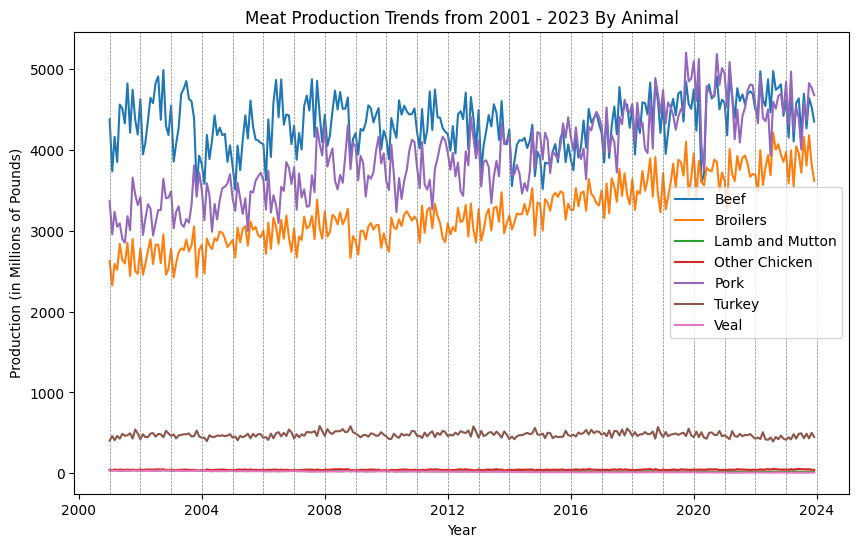

In [28]:
plt.figure(figsize=(10, 6))
for animal in meat_prod_animal.columns:
    plt.plot(meat_prod_animal.index, meat_prod_animal[animal], label=animal)

plt.title('Meat Production Trends from 2001 - 2023 By Animal')
plt.xlabel('Year')
plt.ylabel('Production (in Millions of Pounds)')
plt.legend()

for year in range(2001, 2025):
    plt.axvline(x=pd.to_datetime(str(year)), color='gray', linestyle='--', linewidth=0.5)

plt.show()


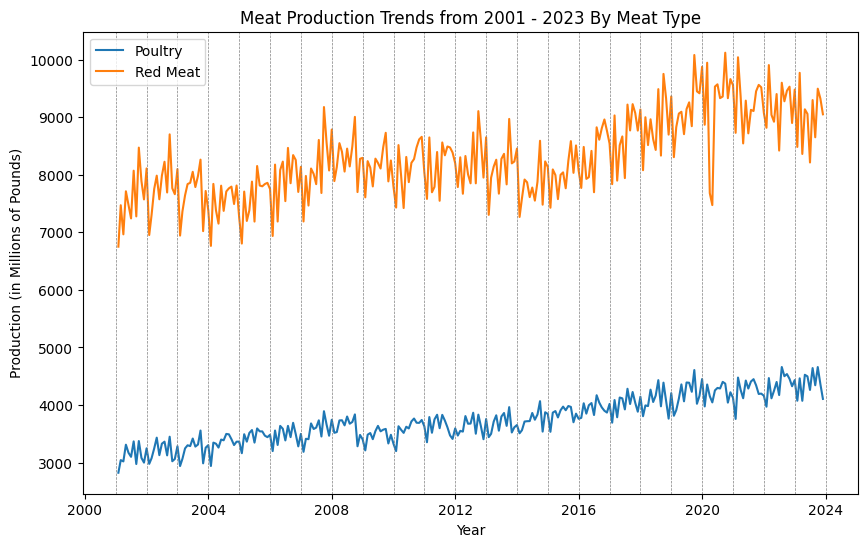

In [29]:
plt.figure(figsize=(10, 6))
for meat_type in meat_prod_type.columns:
    plt.plot(meat_prod_type.index, meat_prod_type[meat_type], label=meat_type)

plt.title('Meat Production Trends from 2001 - 2023 By Meat Type')
plt.xlabel('Year')
plt.ylabel('Production (in Millions of Pounds)')
plt.legend()

for year in range(2001, 2025):
    plt.axvline(x=pd.to_datetime(str(year)), color='gray', linestyle='--', linewidth=0.5)

plt.show()

### Time Series Plots for Storage

In [30]:
# show storage trends by animal
meat_storage_animal = meat_storage_processed.groupby(['Date', 'Animal']).sum().reset_index()
meat_storage_animal = meat_storage_animal.pivot(index='Date', columns='Animal', values='Weight')
meat_storage_animal.dropna(inplace=True)

meat_storage_type = meat_storage_processed.groupby(['Date', 'Type_Of_Meat']).sum().reset_index()
meat_storage_type = meat_storage_type.pivot(index='Date', columns='Type_Of_Meat', values='Weight')
meat_storage_type.dropna(inplace=True)
meat_storage_type = meat_storage_type[meat_storage_type.index > meat_storage_animal.index.min()] 

/var/folders/ld/qvd3psnd7j5d55kqqx7m2yfr0000gn/T/ipykernel_33641/2052230922.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meat_storage_animal = meat_storage_processed.groupby(['Date', 'Animal']).sum().reset_index()
/var/folders/ld/qvd3psnd7j5d55kqqx7m2yfr0000gn/T/ipykernel_33641/2052230922.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meat_storage_type = meat_storage_processed.groupby(['Date', 'Type_Of_Meat']).sum().reset_index()


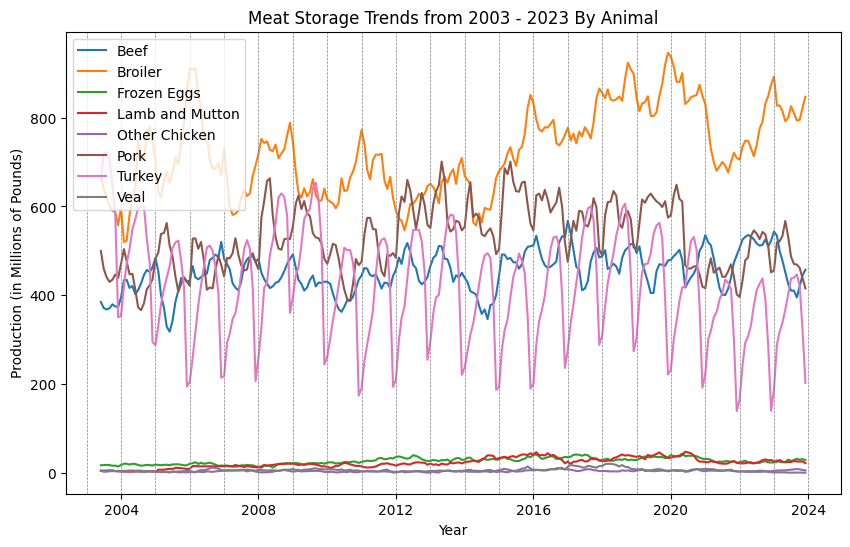

In [31]:
plt.figure(figsize=(10, 6))
for animal in meat_storage_animal.columns:
    plt.plot(meat_storage_animal.index, meat_storage_animal[animal], label=animal)

plt.title('Meat Storage Trends from 2003 - 2023 By Animal')
plt.xlabel('Year')
plt.ylabel('Production (in Millions of Pounds)')
plt.legend()

for year in range(2003, 2025):
    plt.axvline(x=pd.to_datetime(str(year)), color='gray', linestyle='--', linewidth=0.5)

plt.show()


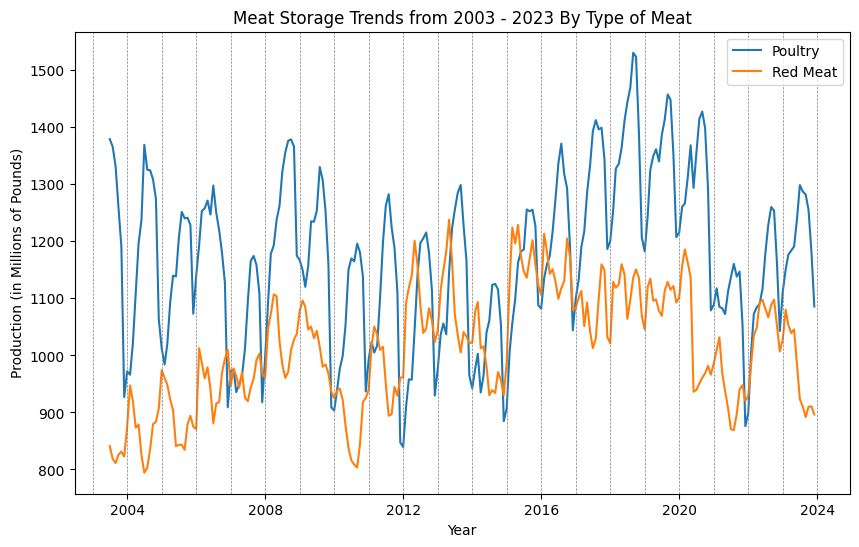

In [32]:
plt.figure(figsize=(10, 6))
for meat_type in meat_storage_type.columns:
    plt.plot(meat_storage_type.index, meat_storage_type[meat_type], label=meat_type)

plt.title('Meat Storage Trends from 2003 - 2023 By Type of Meat')
plt.xlabel('Year')
plt.ylabel('Production (in Millions of Pounds)')
plt.legend()

for year in range(2003, 2025):
    plt.axvline(x=pd.to_datetime(str(year)), color='gray', linestyle='--', linewidth=0.5)

plt.show()

## Step 3 - Seasonality

### Seasonal Trends for Meat Production

In [33]:
prod_seasonal_animal = meat_prod_animal.copy()
prod_seasonal_animal['Month'] = prod_seasonal_animal.index.month
prod_seasonal_animal = prod_seasonal_animal.groupby(['Month']).mean()

prod_seasonal_type = meat_prod_type.copy()
prod_seasonal_type['Month'] = prod_seasonal_type.index.month
prod_seasonal_type = prod_seasonal_type.groupby(['Month']).mean()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

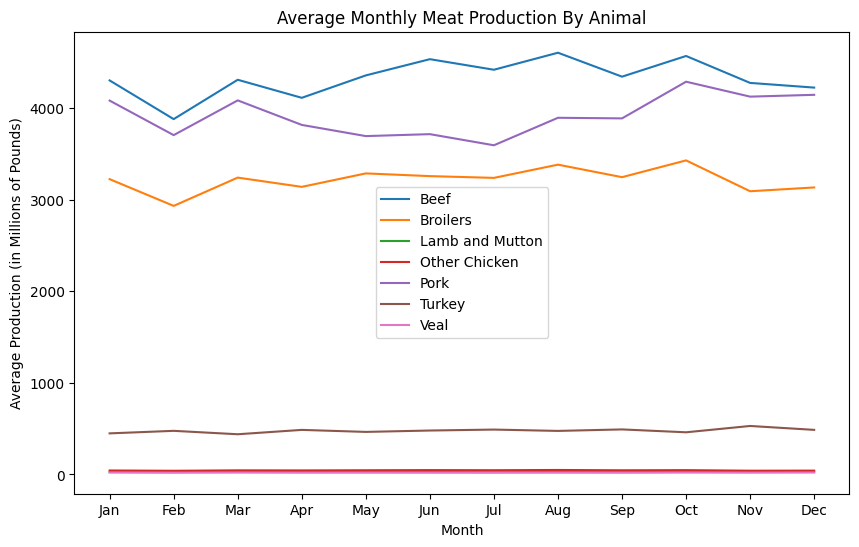

In [34]:
plt.figure(figsize=(10, 6))
for animal in prod_seasonal_animal.columns:
    plt.plot(prod_seasonal_animal.index, prod_seasonal_animal[animal], label=animal)

plt.title('Average Monthly Meat Production By Animal')
plt.xlabel('Month')
plt.ylabel('Average Production (in Millions of Pounds)')
plt.xticks(prod_seasonal_animal.index, months)

plt.legend()
plt.show()

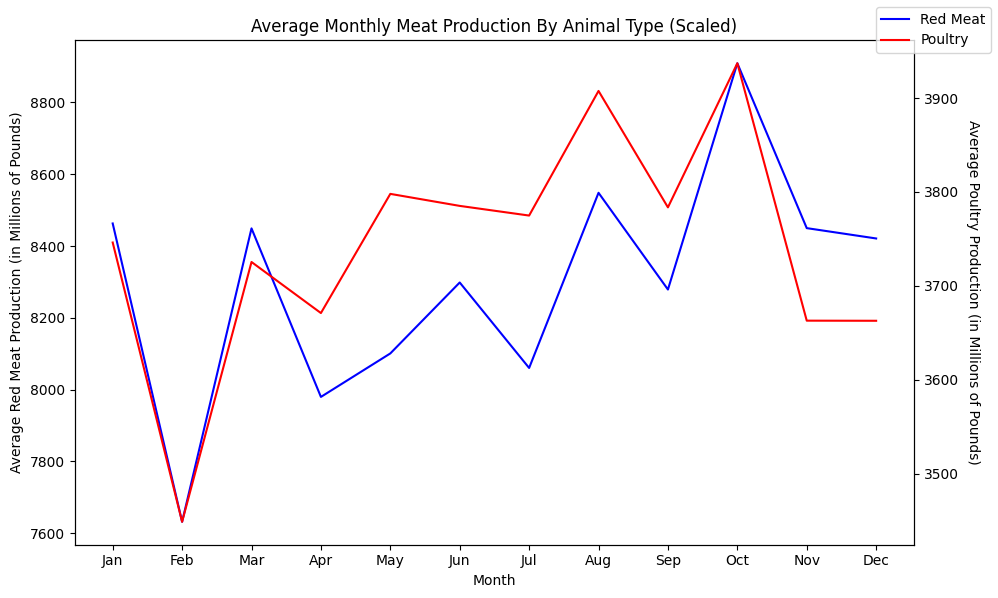

In [35]:
# production trends by animal type - scaled to show trends more explicitly
fig, ax1 = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(10, 6))
ax1.plot(prod_seasonal_type.index, prod_seasonal_type['Red Meat'], label='Red Meat', color='blue')
ax2 = ax1.twinx()
ax2.plot(prod_seasonal_type.index, prod_seasonal_type['Poultry'], label='Poultry', color='red')

plt.title('Average Monthly Meat Production By Animal Type (Scaled)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Red Meat Production (in Millions of Pounds)')
ax2.set_ylabel('Average Poultry Production (in Millions of Pounds)', rotation=270, labelpad=15) 
plt.xticks(prod_seasonal_animal.index, months)

fig.legend()
fig.tight_layout()
plt.show()

### Seasonal Trends for Meat Storage

In [36]:
storage_seasonal_animal = meat_storage_animal.copy()
storage_seasonal_animal['Month'] = storage_seasonal_animal.index.month
storage_seasonal_animal = storage_seasonal_animal.groupby(['Month']).mean()

storage_seasonal_type = meat_storage_type.copy()
storage_seasonal_type['Month'] = storage_seasonal_type.index.month
storage_seasonal_type = storage_seasonal_type.groupby(['Month']).mean()

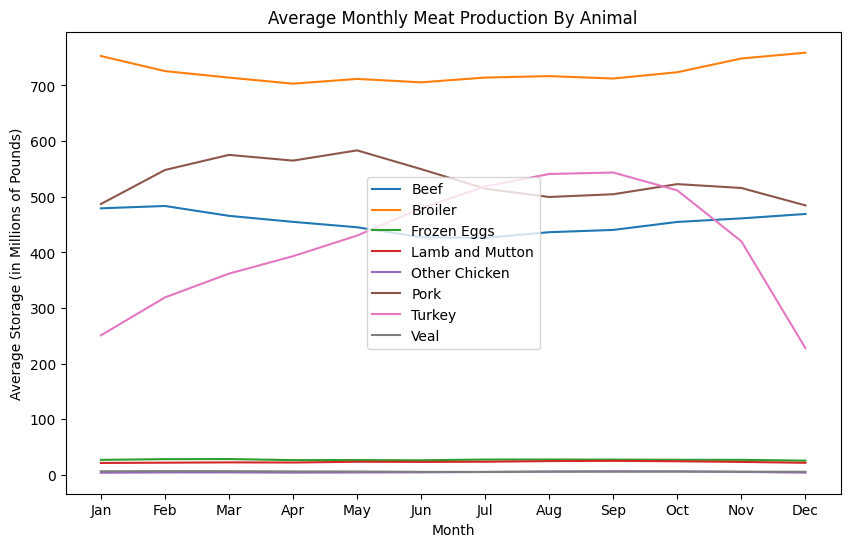

In [37]:
plt.figure(figsize=(10, 6))
for animal in storage_seasonal_animal.columns:
    plt.plot(storage_seasonal_animal.index, storage_seasonal_animal[animal], label=animal)

plt.title('Average Monthly Meat Production By Animal')
plt.xlabel('Month')
plt.ylabel('Average Storage (in Millions of Pounds)')
plt.xticks(storage_seasonal_animal.index, months)

plt.legend()
plt.show()

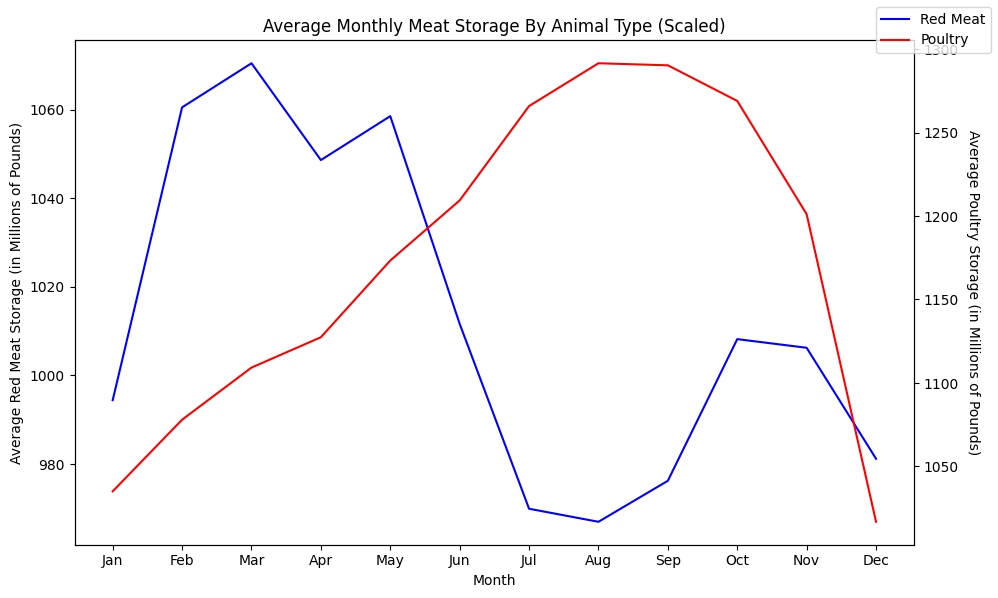

In [38]:
fig, ax1 = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(10, 6))
ax1.plot(storage_seasonal_type.index, storage_seasonal_type['Red Meat'], label='Red Meat', color='blue')
ax2 = ax1.twinx()
ax2.plot(storage_seasonal_type.index, storage_seasonal_type['Poultry'], label='Poultry', color='red')

plt.title('Average Monthly Meat Storage By Animal Type (Scaled)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Red Meat Storage (in Millions of Pounds)')
ax2.set_ylabel('Average Poultry Storage (in Millions of Pounds)', rotation=270, labelpad=15) 
plt.xticks(storage_seasonal_type.index, months)

fig.legend()
fig.tight_layout()
plt.show()

## Step 4 - Meat Slaughter Volume / Weight

In [82]:
meat_counts_processed

,Date,Animal,Count,Type_Of_Meat
0,2023-12-01,Cattle,2593400,Red Meat
1,2023-11-01,Cattle,2729900,Red Meat
2,2023-10-01,Cattle,2826000,Red Meat
3,2023-09-01,Cattle,2610600,Red Meat
4,2023-08-01,Cattle,2890000,Red Meat
...,...,...,...,...
15061,1983-04-01,Turkeys,10563000,Poultry
15062,1983-03-01,Turkeys,11979000,Poultry
15063,1983-02-01,Turkeys,8477000,Poultry
15064,1983-01-01,Turkeys,8532000,Poultry


In [80]:
# getting yield data
meat_yield = meat_weights_processed.copy()
meat_yield['index'] = meat_yield['Date'].astype(str) + ';' + meat_yield['Animal'] + ';' + meat_yield['Type_Of_Meat']
meat_yield[meat_yield['index'] == '2023-12-01;Cattle;Red Meat']

,Date,Animal,Weight,Live_Or_Dressed,Type_Of_Meat,index
0,2023-12-01,Cattle,1401.0,Live,Red Meat,2023-12-01;Cattle;Red Meat
1968,2023-12-01,Cattle,1404.0,Live,Red Meat,2023-12-01;Cattle;Red Meat
5412,2023-12-01,Cattle,849.0,Dressed,Red Meat,2023-12-01;Cattle;Red Meat


## Step 5 - Correlations / Integration

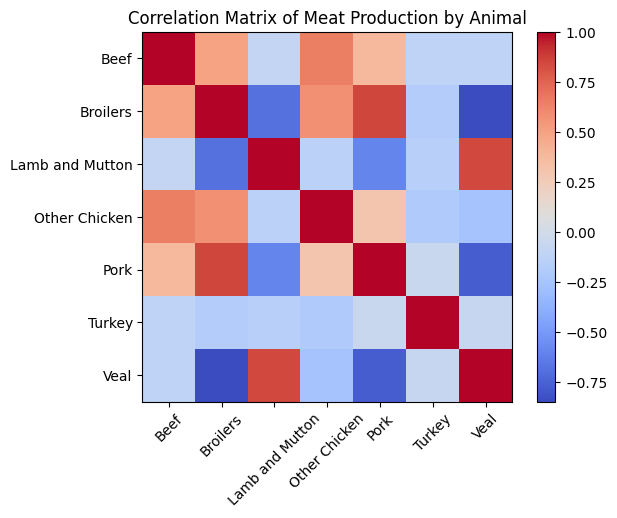

In [39]:
# Correlations between different types of meat being produced
animal_corr = meat_prod_animal.corr()
plt.imshow(animal_corr, cmap='coolwarm')
variables = animal_corr.columns

plt.xticks(range(len(variables)), variables, rotation=45)
plt.yticks(range(len(variables)), variables)
plt.colorbar()

plt.title('Correlation Matrix of Meat Production by Animal')

plt.show()

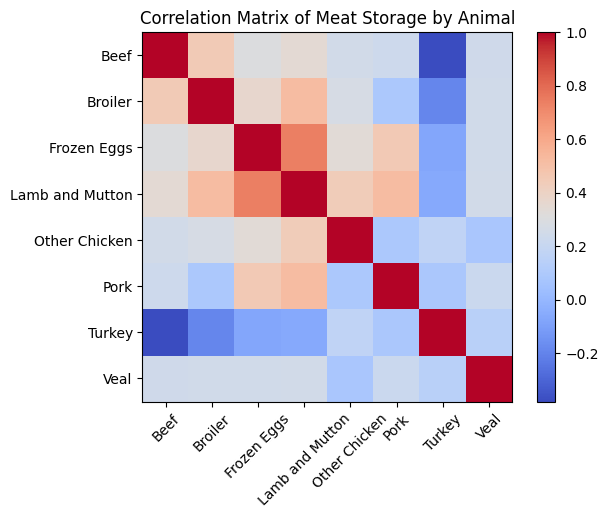

In [40]:
# Correlations between different types of meat being produced
storage_corr = meat_storage_animal.corr()
plt.imshow(storage_corr, cmap='coolwarm')
variables = storage_corr.columns

plt.xticks(range(len(variables)), variables, rotation=45)
plt.yticks(range(len(variables)), variables)
plt.colorbar()

plt.title('Correlation Matrix of Meat Storage by Animal')

plt.show()

In [41]:
poultry_symbols = {'PPC', 'TSN'}
stock_stats = pd.read_csv("../Datathon_Data/all_stock_and_etfs.csv")
stock_stats['Average'] = (stock_stats['High'] + stock_stats['Low']) / 2

In [42]:
poultry_stocks = stock_stats[stock_stats['Ticker_Symbol'].isin(poultry_symbols)]
poultry_stocks = poultry_stocks.pivot(index='Date-Time', values='Average', columns='Ticker_Symbol')
poultry_stocks.index = pd.to_datetime(poultry_stocks.index)
poultry_stocks = poultry_stocks[poultry_stocks.index >= meat_prod_type.index.min()]

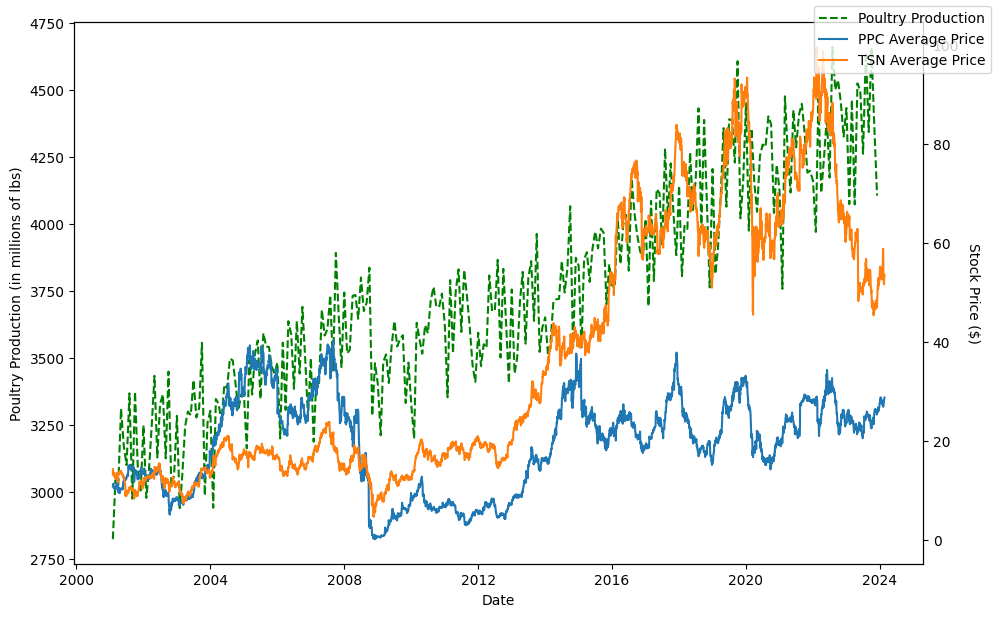

In [43]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(meat_prod_type.index, meat_prod_type['Poultry'], label='Poultry Production', linestyle="--", color="green")

ax2 = ax1.twinx()

for stock in poultry_stocks.columns:
    ax2.plot(poultry_stocks.index, poultry_stocks[stock], label=f'{stock} Average Price')

ax1.set_ylabel('Poultry Production (in millions of lbs)')
ax2.set_ylabel('Stock Price ($)', rotation=270, labelpad=15)

fig.legend()
fig.tight_layout()
ax1.set_xlabel("Date")

plt.show()

### Look at SNAP Trends